# Mah 134C Week 7

In [1]:
import math
import numpy as np
from scipy.stats import norm
def black_scholes_call(S_t, K, dt, r, sigma, delta):
    d1 = (np.log(S_t / K) + (r -delta + 0.5 * sigma ** 2) * dt) / (sigma * np.sqrt(dt))
    d2 = d1 - sigma * np.sqrt(dt)
    call_price = S_t * np.exp(-delta * dt) * norm.cdf(d1) - K * np.exp(-r * dt) * norm.cdf(d2)
    return call_price

def black_scholes_put(S_t, K, dt, r, sigma, delta):
    d1 = (np.log(S_t / K) + (r -delta + 0.5 * sigma ** 2) * dt) / (sigma * np.sqrt(dt))
    d2 = d1 - sigma * np.sqrt(dt)
    call_price = - S_t * np.exp(-delta * dt) * norm.cdf(-d1) + K * np.exp(-r * dt) * norm.cdf(-d2)
    return call_price

def call_Delta(S_t, K, dt, r, sigma, delta):
    d1 = (np.log(S_t / K) + (r -delta + 0.5 * sigma ** 2) * dt) / (sigma * np.sqrt(dt))  
    return np.exp(-delta * dt) * norm.cdf(d1)

def put_Delta(S_t, K, dt, r, sigma, delta):
    d1 = (np.log(S_t / K) + (r -delta + 0.5 * sigma ** 2) * dt) / (sigma * np.sqrt(dt))  
    return -np.exp(-delta * dt) * norm.cdf(-d1)

def Gamma(S_t, K, dt, r, sigma, delta):
    d1 = (np.log(S_t / K) + (r -delta + 0.5 * sigma ** 2) * dt) / (sigma * np.sqrt(dt))
    return np.exp(-delta * dt) * norm.pdf(d1)/(S_t * sigma * np.sqrt(dt)) 

def call_Theta(S_t, K, dt, r, sigma, delta):
    d1 = (np.log(S_t / K) + (r -delta + 0.5 * sigma ** 2) * dt) / (sigma * np.sqrt(dt))
    d2 = d1 - sigma * np.sqrt(dt)
    return delta * S_t * np.exp(-delta * dt)*norm.cdf(d1) - r * K * np.exp(-r*dt)*norm.cdf(d2)-(K * np.exp(-r*dt) * sigma * norm.pdf(d2))/ (2 * np.sqrt(dt)) 

def put_Theta(S_t, K, dt, r, sigma, delta):
    d1 = (np.log(S_t / K) + (r -delta + 0.5 * sigma ** 2) * dt) / (sigma * np.sqrt(dt))
    d2 = d1 - sigma * np.sqrt(dt)
    return call_Theta(S_t, K, dt, r, sigma, delta) + r * K * np.exp(-r*dt) - delta * S_t * np.exp(-delta * dt)

def put_given_call(C_t, S_t, K, r, dt):
    return C_t - S_t + K * math.exp(-r * dt)
def call_given_put(P_t, S_t, K, r, dt):
    return P_t + S_t - K * math.exp(-r * dt)

**Quiz 6.1** \
Consider a 50-strike European call option with the risk-free annual continuously compounded interest rate r = 7%,  volatility $\sigma$ = 0.25, and the underlying stock price S = 48.00.  Assume the stock pays a continuous dividend $\delta$ = 2.0% and the option expires in 60 days.

You sell 1 call option today. What is the profit or loss after 5 days if the stock price rises to 50.00 while $r,\delta, \sigma$ remained unchanged?

Please use the Black-Scholes option pricing model, rounded to the nearest cent, for all numerical option prices.

In [126]:
print(f"The value of our portfolio today is {-black_scholes_call(48, 50, 60/365, 0.07, 0.25, 0.02):.2f}")
print(f"The value of our portfolio after 5 days is {-black_scholes_call(50, 50, 55/365, 0.07, 0.25, 0.02):.2f}")
print(f"The profit is {black_scholes_call(48, 50, 60/365, 0.07, 0.25, 0.02)-black_scholes_call(50, 50, 55/365, 0.07, 0.25, 0.02):.2f}")
# call_Delta(48, 50, 60/365, 0.07, 0.25, 0.02) * 2 + 0.5 * Gamma(48,50,60/365, 0.07, 0.25, 0.02) * 4 + call_Theta(48,50,60/365, 0.07, 0.25, 0.02) * 5/365

The value of our portfolio today is -1.27
The value of our portfolio after 5 days is -2.11
The profit is -0.84


**Quiz 6.2**
Consider a 60-strike European call option with the risk-free annual continuously compounded interest rate r = 7%, volatility $\sigma$ = 0.28, and the underlying stock price S = 62.00.  Assume the stock pays a continuous dividend $\delta$ = 1.0% and the option expires in 73 days.

You buy 1 call option today.   What is the profit or loss if the stock price immediately rises to 63.00 while r, $\delta$, and $\sigma$ remained unchanged?

Please use the Black-Scholes option pricing model, rounded to the nearest cent, for all numerical option prices.

In [127]:
print(f"The profit is {black_scholes_call(63, 60, 73/365, 0.07, 0.28, 0.01) - black_scholes_call(62, 60, 73/365, 0.07, 0.28, 0.01):.2f}")
# call_Delta(62, 60, 73/365, 0.07, 0.28, 0.01) * 1 + 0.5 * Gamma(62,60,73/365, 0.07, 0.28, 0.01) * 1

The profit is 0.68


**Quiz 6.3**
A delta-hedged portfolio $\Pi$ has a portfolio delta equal to zero:
$$\frac{d\Pi}{dS} = 0$$

What is the total dollar cost to create a delta-hedged portfolio that includes a long stock position and 200 short European call options, rounded to the nearest integer dollar?  

You are free to choose the number of shares of stock you are long in order to make the portfolio delta equal to zero.  You are allowed to hold a fractional number of shares of stock in the portfolio.

Assume the call options are priced at 4.16, the call option delta is 0.7644, and the stock price is 73.00.

In [14]:
print(f" The total dollar cost to create the Delta-hedged portfolio is {-(-200 * 0.7644) * 73 - 200 * 4.16:.0f}")

 The total dollar cost to create the Delta-hedged portfolio is 10328


**Quiz 6.4**

Assume a stock has price S = 33.00, volatility $\sigma$ = 0.32,  and pays continuous dividends at a rate of 1% per year. The risk-free annual continuously compounded interest rate r is 6%.

You sell short 100 35-strike European call options on this stock with 68 days until expiration.

You also buy or sell shares of stock to delta-hedge your call option position, so that your total portfolio delta is zero:
$$\frac{d\Pi}{dS} = 0$$

You are free to choose the number of shares of stock you buy or sell  in order to make the portfolio delta equal to zero.  You are allowed to hold a fractional number of shares of stock in the portfolio.

Please use the Black-Scholes option pricing model, rounded to the nearest cent, for all numerical option prices.

What is your overnight profit or loss if the stock price rises to 34.50? 

In [38]:
print(f"We need to buy {100 * call_Delta(33, 35, 68/365, 0.06, 0.32, 0.01):.2f} units of stocks for delta hedged portfolio. The cost is {100 * call_Delta(33, 35, 68/365, 0.06, 0.32, 0.01) * 33:.2f}")
print(f"The profit from long position on the stock is {1.5 * 100 * call_Delta(33, 35, 68/365, 0.06, 0.32, 0.01):.2f}")
print(f"The profit from short position call options is {100 * (black_scholes_call(33, 35, 68/365, 0.06, 0.32, 0.01) - black_scholes_call(34.5, 35, 67/365, 0.06, 0.32, 0.01)):.2f}")
print(f"The interested we paid is {100 * call_Delta(33, 35, 68/365, 0.06, 0.32, 0.01) * 33 * (np.exp(0.06 * 1/356)-1):.2f}")

print(f"The profit is {1.5 * 100 * call_Delta(33, 35, 68/365, 0.06, 0.32, 0.01) + 100 * (black_scholes_call(33, 35, 68/365, 0.06, 0.32, 0.01) - black_scholes_call(34.5, 35, 67/365, 0.06, 0.32, 0.01)) - 100 * call_Delta(33, 35, 68/365, 0.06, 0.32, 0.01) * 33 * (np.exp(0.06 * 1/365)-1):.2f}")

We need to buy 38.54 units of stocks for delta hedged portfolio. The cost is 1271.75
The profit from long position on the stock is 57.81
The profit from short position call options is -65.69
The interested we paid is 0.21
The profit is -8.09


**Quiz 6.5**
In this problem we are given that the stock price S = 40, volatility $\sigma$ = 30%, risk-free annual continuously compounded interest rate r = 8%, and continuous dividend rate $\delta = 0$. Suppose you sell 100 45-strike European call options with 91 days to expiration.

You also buy or sell shares of stock to delta-hedge your call option position, so that your total portfolio delta is zero:
$$\frac{d\Pi}{dS} = 0$$

You are free to choose the number of shares of stock you buy or sell in order to make the portfolio delta equal to zero.  You are allowed to hold a fractional number of shares of stock in the portfolio.

Please use the Black-Scholes option pricing model, rounded to the nearest cent, for all numerical option prices.

What is your overnight profit / loss if the stock price tomorrow is 39? 

In [133]:
print(f"We need to buy {100 *  call_Delta(40, 45, 91/365, 0.08, 0.3, 0):.2f} units of stocks for delta hedged portfolio. The cost is {100 * call_Delta(40, 45, 91/365, 0.08, 0.3, 0) * 40:.2f}")
print(f"The old option price is {black_scholes_call(40, 45, 91/365, 0.08, 0.3, 0):.2f}")
print(f"The new option price is {black_scholes_call(39, 45, 90/365, 0.08, 0.3, 0):.2f}")
print(f"The change in the call option price is {0.26}")
print(f"The profit from long position on the stock is {-1 * 100 * call_Delta(40, 45, 91/365, 0.08, 0.3, 0):.2f}")
print(f"The profit from the short position on the call options is 26")
print(f"The interest paid is {1126.19 * (np.exp(0.08/365)-1):.2f}")
print(f"The overnight profit is {-2.38}")

We need to buy 28.15 units of stocks for delta hedged portfolio. The cost is 1126.19
The old option price is 0.97
The new option price is 0.71
The change in the call option price is 0.26
The profit from long position on the stock is -28.15
The profit from the short position on the call options is 26
The interest paid is 0.25
The overnight profit is -2.38


**Quiz 6.6**
In this problem we are given that S = 40, volatility $\sigma$ = 30%, risk-free annual continuously compounded interest rate r = 8%, and continuous dividend rate $\delta = 0$.  Suppose you sell 100 45-strike European call options with 91 days to expiration.

You also buy or sell shares of stock to delta-hedge your call option position, so that your total portfolio delta is zero:
$$\frac{d\Pi}{dS} = 0$$

You are free to choose the number of shares of stock you buy or sell in order to make the portfolio delta equal to zero.  You are allowed to hold a fractional number of shares of stock in the portfolio.

Please use the Black-Scholes option pricing model, rounded to the nearest cent, for all numerical option prices.

What is your overnight profit / loss if the stock price tomorrow is 41? 

In [166]:
print(f"We need to purchase {100 * call_Delta(40, 45, 91/365, 0.08, 0.3, 0):.4f} shares of stock to create the delta-hedged portfolio")
print(f"The cost for creating this delta-hedged portfolio is {28.15 * 40:.2f}")
print(f"The old call option price is {black_scholes_call(40, 45, 91/365, 0.08, 0.3, 0):.2f}")
print(f"The new call option price is {black_scholes_call(41, 45, 90/365, 0.08, 0.3, 0):.2f}")
print(f"The profit from holding the stock is {1 * 28.15}")
print(f"The profit from shorting 100 shares of the call option is {-(1.27 - 0.97) * 100:.2f}")
print(f"The interest we need to pay is {1126 * (np.exp(0.08 * 1/365) - 1):.2f} ")
print(f"The overnight profit is {28.15 - 30 -0.25:.2f}")

We need to purchase 28.1548 shares of stock to create the delta-hedged portfolio
The cost for creating this delta-hedged portfolio is 1126.00
The old call option price is 0.97
The new call option price is 1.27
The profit from holding the stock is 28.15
The profit from shorting 100 shares of the call option is -30.00
The interest we need to pay is 0.25 
The overnight profit is -2.10


**Exercise**
We use the data from this problem. Suppose that we want to rebalance this portfolio so that it is still delta-hedged after the change in stock price. What would be the new number of shares of the stock that we need to buy. 

In [15]:
print(f"Next day, we need to purchase {100 * call_Delta(41, 45, 90/365, 0.08, 0.3, 0):.2f} shares of stock to create the delta-hedged portfolio")
print(f"We need to purchase {33.80-28.15:.2f} extra shares of the stock to reblance our delta-hedged portfolio")
print(f"The cost for rebalancing the portfolio is {5.65 * 41:.2f}")

Next day, we need to purchase 33.80 shares of stock to create the delta-hedged portfolio
We need to purchase 5.65 extra shares of the stock to reblance our delta-hedged portfolio
The cost for rebalancing the portfolio is 231.65


**Quiz 6.7**
In this problem we are given that the stock price S = 250, volatility $\sigma$ = 50%,  risk-free annual continuously compounded interest rate r = 3%, and the continuous dividend rate $\delta = 0$.

Suppose you sell 100 at-the-money European put options with 100 days to expiration.

You also buy or sell shares of stock to delta-hedge your put option position, so that your total portfolio delta is zero:
$$\frac{d\Pi}{dS} = 0$$

You are free to choose the number of shares of stock you buy or sell in order to make the portfolio delta equal to zero.  How many shares of stock should you buy or sell?  

Round your answer to the nearest integer number of shares.

Please assume the Black-Scholes option pricing model holds and that there are no arbitrage opportunities.

In [20]:
print(f"We need to sell {put_Delta(250, 250, 100/365, 0.03, 0.5, 0) * -100:.0f} shares of stock to make the portfolio delta equal to zero")

We need to sell 44 shares of stock to make the portfolio delta equal to zero


**Quiz 6.8**
Consider a 50-strike European put option on a stock that pays a 2.0% continuous dividend, has volatility σ = 0.25, and has a current price of  48.00. The risk-free continuously compounded interest rate r = 7%.

 The put option expires in 60 days from today. You sell 1 put option today.

 What your profit or loss after 5 days if the stock price increases to 50.00 during this time period, while the volatility, interest rate, and dividends remain unchanged ?  

Please round your answer to the nearest cent.

Please use the Black-Scholes option pricing model, rounded to the nearest cent, for all numerical option prices.

In [22]:
print(f"The profit is {-(black_scholes_put(50, 50, 55/365, 0.07, 0.25, 0.02) - black_scholes_put(48, 50, 60/365, 0.07, 0.25, 0.02)):.2f}")

The profit is 1.12


**Quiz 6.10**
In this problem we are given that the stock price S = 250, volatility $\sigma$ = 50%,  risk-free annual continuously compounded interest rate r = 3%, and the continuous dividend rate $\delta$ = 2%.

Suppose you buy 1 at-the-money European put option with 1 year to expiration. If all variables are constant except the passage of time, what will be the approximate percentage change in the value of your long put option position over 10 days?

Please assume the Black-Scholes option pricing model holds and that there are no arbitrage opportunities.  

In [27]:
change = put_Theta(250, 250, 1, 0.03, 0.5, 0.02) * 10/365
current_price = black_scholes_put(250, 250, 1, 0.03, 0.5, 0.02)
print(f"the percentage change is approximately {change/current_price:.2f}")

the percentage change is approximately -0.01


**Exercise 13.7** Consider a 40-strike 180-day call with S = 40. Compute a delta-gamma-theta approximation for the value of the call after 1, 5, and 25 days. For each day, consider stock prices of 36 to 44.00 in 0.25 increments and compare the actual option premium at each stock price with the predicted premium. Where are the two the same?

In [15]:
delta = call_Delta(40, 40, 180/365, 0.08, 0.3, 0)
gamma = Gamma(40, 40, 180/365, 0.08, 0.3, 0)
theta = call_Theta(40, 40, 180/365, 0.08, 0.3, 0)



call_price = black_scholes_call(40, 40, 180/365, 0.08, 0.3, 0)
Slist = np.linspace(36, 44, 33)

print(delta, gamma, theta)
print(call_price)

print("Value after 1 day")
for S in Slist:
    predicted = call_price + delta * (S - 40) + 0.5 * gamma * (S-40)**2 + theta/365
    actual = black_scholes_call(S, 40, 180/365-1/365, 0.08, 0.3, 0)
    print(f"At stock price {S}, the actual call option price is {actual:.2f}, and the predicted price is {predicted:.2f}")

print("\nValue after 5 day")
for S in Slist:
    predicted = call_price + delta * (S - 40) + 0.5 * gamma * (S-40)**2 + theta * 5/365
    actual = black_scholes_call(S, 40, 180/365-5/365, 0.08, 0.3, 0)
    print(f"At stock price {S}, the actual call option price is {actual:.2f}, and the predicted price is {predicted:.2f}")
    
print("\nValue after 25 day")
for S in Slist:
    predicted = call_price + delta * (S - 40) + 0.5 * gamma * (S-40)**2 + theta * 25/365
    actual = black_scholes_call(S, 40, 180/365-25/365, 0.08, 0.3, 0)
    print(f"At stock price {S}, the actual call option price is {actual:.2f}, and the predicted price is {predicted:.2f}")

0.6150871393332188 0.045357345099654944 -4.904267695035319
4.12174997507671
Value after 1 day
At stock price 36.0, the actual call option price is 2.04, and the predicted price is 2.01
At stock price 36.25, the actual call option price is 2.14, and the predicted price is 2.12
At stock price 36.5, the actual call option price is 2.25, and the predicted price is 2.23
At stock price 36.75, the actual call option price is 2.36, and the predicted price is 2.35
At stock price 37.0, the actual call option price is 2.48, and the predicted price is 2.47
At stock price 37.25, the actual call option price is 2.60, and the predicted price is 2.59
At stock price 37.5, the actual call option price is 2.72, and the predicted price is 2.71
At stock price 37.75, the actual call option price is 2.84, and the predicted price is 2.84
At stock price 38.0, the actual call option price is 2.97, and the predicted price is 2.97
At stock price 38.25, the actual call option price is 3.10, and the predicted price

**Exercise 13.9** Consider a 40-strike call with 91 days to expiration. Graph the results from the following calculations. \
a. Compute the actual price with 90 days to expiration at 1 intervals from 30 to 50. \
b. Compute the estimated price with 90 days to expiration using a delta approximation. \
c. Compute the estimated price with 90 days to expiration using a delta-gamma approximation. \
d. Compute the estimated price with 90 days to expiration using a delta-gamma-theta approximation. 

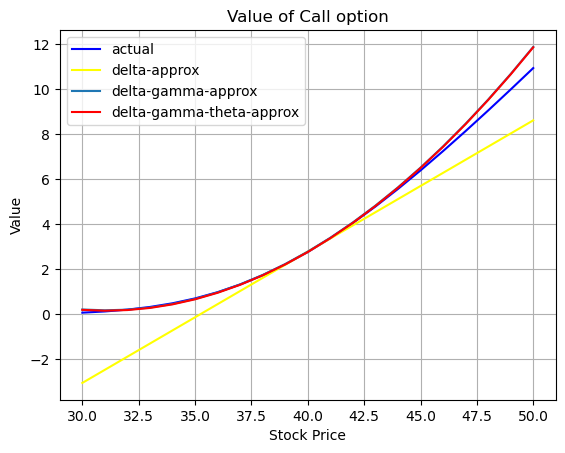

In [3]:
import numpy as np
import matplotlib.pyplot as plt

K = 40
r = 0.08
delta = 0
sigma = 0.3
S = 40

C = black_scholes_call(S, K, 91/365, r,  sigma, delta)
delta_C = call_Delta(S, K, 91/365, r,  sigma, delta)
gamma = Gamma(S, K,  91/365, r,sigma, delta)
theta = call_Theta(S, K, 91/365, r,  sigma, delta)

Slist = np.linspace(30, 50, 21)

def actual(Snew):
    return black_scholes_call(Snew, K, 90/365, r, sigma, delta)

def delta_approx(Snew):
    return C + (Snew-S) * delta_C

def delta_gamma_approx(Snew):
    return C + (Snew - S) * delta_C + 0.5 * gamma * (Snew - S)**2

def delta_gamma_theta_approx(Snew, dt):
    return C + (Snew - S) * delta_C + 0.5 * gamma * (Snew - S)**2 + theta * dt

P_1 = actual(Slist)
P_2 = delta_approx(Slist)
P_3 = delta_gamma_approx(Slist)
P_4 = delta_gamma_theta_approx(Slist, 1/365)

plt.plot(Slist, P_1, label = "actual", color = "blue")
plt.plot(Slist, P_2, label = "delta-approx", color = "yellow")
plt.plot(Slist, P_3, label = "delta-gamma-approx")
plt.plot(Slist, P_4, label = "delta-gamma-theta-approx", color = "red")

plt.xlabel('Stock Price')
plt.ylabel('Value')
plt.title('Value of Call option')
plt.grid(True)

plt.legend()
plt.show()

**Exercise**
Consider a stock whose current price is 100. An one-year at-the-money call option is sold for 10. Assume that the risk free rate is 0.05, and the stock pays no dividend. Compute the implied volatility of this stock. 

In [5]:
sigma = 0.188
print(black_scholes_call(100, 100, 1, 0.05, sigma, 0))
print(f"The implied volatility is", sigma)

10.001060068162936
The implied volatility is 0.188


**Example** \
Consider a 50-strike European call option with the risk-free annual continuously compounded interest rate r = 7%,  volatility $\sigma$ = 0.25, and the underlying stock price S = 48.00.  Assume the stock pays a continuous dividend $\delta$ = 2.0% and the option expires in 60 days.

Assume that the stock price next day is 49. Use the delta approximation, delta-gamma, approximation, delta-gamma-theta approximation to compute the next day price. 



In [6]:
C_today = black_scholes_call(48, 50, 60/365, 0.07, 0.25,0.02)

print(f"The price of this call option today is {black_scholes_call(48, 50, 60/365, 0.07, 0.25,0.02):.4f}")
print(f"The actual price of this call option tomorrow is {black_scholes_call(49, 50, 59/365, 0.07, 0.25,0.02):.4f}")

delta_c = call_Delta(48, 50, 60/365, 0.07, 0.25, 0.02)
gamma = Gamma(48, 50, 60/365, 0.07, 0.25, 0.02)
theta = call_Theta(48, 50, 60/365, 0.07, 0.25, 0.02)

print(f"The delta is {delta_c: .4f}")
print(f"The gamma is {gamma: .4f}")
print(f"The theta is {theta: .4f}")

print(f"The delta-approximation of the next day call option price is {C_today + delta_c * 1:.4f}")
print(f"The delta-gamma-approximation of the next day call option price is {C_today + delta_c * 1 + 0.5 * gamma * 1:.4f}")
print(f"The delta-gamma-theta approximation of the next day call option price is {C_today + delta_c * 1 + 0.5 * gamma * 1 + theta * (1/365):.4f}")

The price of this call option today is 1.2738
The actual price of this call option tomorrow is 1.6861
The delta is  0.3919
The gamma is  0.0788
The theta is -6.5237
The delta-approximation of the next day call option price is 1.6657
The delta-gamma-approximation of the next day call option price is 1.7051
The delta-gamma-theta approximation of the next day call option price is 1.6872
